## Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logins_data = pd.read_json('logins.json')
logins_data.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# convert to datetime
logins_data['login_time'] = pd.to_datetime(logins_data['login_time'])
logins_data.set_index('login_time', inplace=True)

In [4]:
# aggregate into 15 min intervals

logins_15T_grouped = logins_data.groupby(pd.Grouper(freq='15T')).size().reset_index(name='Number_of_logins')
logins_15T_grouped.head()

,login_time,Number_of_logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


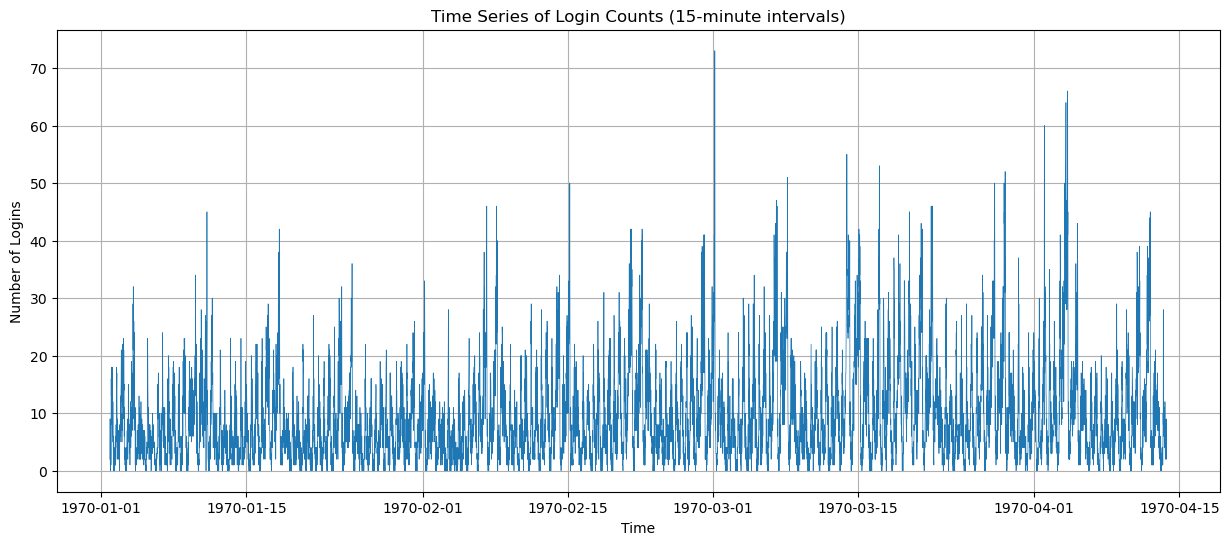

In [5]:
# plot number of logins
plt.figure(figsize=(15, 6))
plt.plot(logins_15T_grouped['login_time'], logins_15T_grouped['Number_of_logins'], linewidth=0.5)
plt.title('Time Series of Login Counts (15-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

In [6]:
# Extract hour
logins_15T_grouped['hour'] = logins_15T_grouped['login_time'].dt.hour

# Extract the day of the week
logins_15T_grouped['day_of_week'] = logins_15T_grouped['login_time'].dt.day_name() 

# Frequency of hours
login_frequency_by_hour = logins_15T_grouped.groupby('hour')['Number_of_logins'].sum()

# Frequency of days
login_frequency_by_time_of_day = logins_15T_grouped.groupby('day_of_week')['Number_of_logins'].sum()

login_frequency_by_time_of_day

day_of_week
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: Number_of_logins, dtype: int64

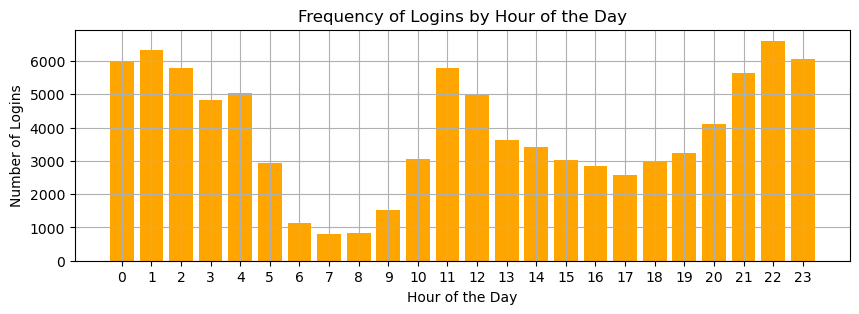

In [7]:
# Histogram: hour

plt.figure(figsize=(10, 3))
plt.bar(login_frequency_by_hour.index, login_frequency_by_hour.values, color='orange', align='center')
plt.title('Frequency of Logins by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Logins')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

* Peak login times span from 9 PM to 1 AM.
* There is a noticeable login spike at 11 AM.
* Early mornings see the fewest logins.

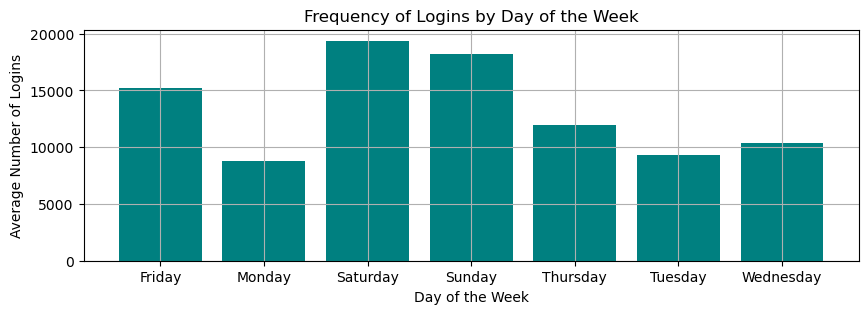

In [8]:
# Histogram: day of the week

plt.figure(figsize=(10, 3))

plt.bar(login_frequency_by_time_of_day.index, login_frequency_by_time_of_day.values, color='teal', align='center')
plt.title('Frequency of Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.show()

* Saturdays and Sundays experience the most logins.
* Mondays have notably fewer logins in comparison.

---

## Part 2 - Experiment and metrics design

*1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?*

**Answer:** The increase in cross-city trips made by driver partners would be my KPI of coice.

*2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:*

*a) how you will implement the experiment*

**Answer:** I would select a group of driver partners from both cities through random sampling and offer them toll reimbursement. Data from the corresponding period in the previous year will be used as a baseline, accounting for any special events or circumstances that might affect the results, like holidays, pandemic-related restrictions, or seasonal changes.

*b) what statistical test(s) you will conduct to verify the significance of the
observation*

**Answer:** I will use a paired sample t-test to compare the average number of cross-city trips before and during the experiment. This test will help us see if there's a statistically significant increase in trips due to the toll reimbursement.

*c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.*

**Answer:** If we observe more cross-city trips during the experiment compared to the baseline, I would suggest adopting the toll reimbursement policy. However, the results will be interpreted with consideration for external factors that could sway the outcome, such as holidays or any other significant events. If such factors are found to influence the results, we might need to conduct further tests over different periods. It could also be beneficial to segment the test further, like comparing the behavior of drivers near the toll bridge to those farther away. As the policy is rolled out, I recommend ongoing testing to track trends and refine the policy effectively.
        

---

## Part 3 - Predictive modeling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

In [9]:
ultimate_data = pd.read_json('ultimate_data_challenge.json')

In [10]:
ultimate_data.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [11]:
# missing values
print(ultimate_data.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [12]:
# replace missing values for phone number with 'Unknown'
ultimate_data['phone'].fillna('Unknown', inplace=True)

print(ultimate_data.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


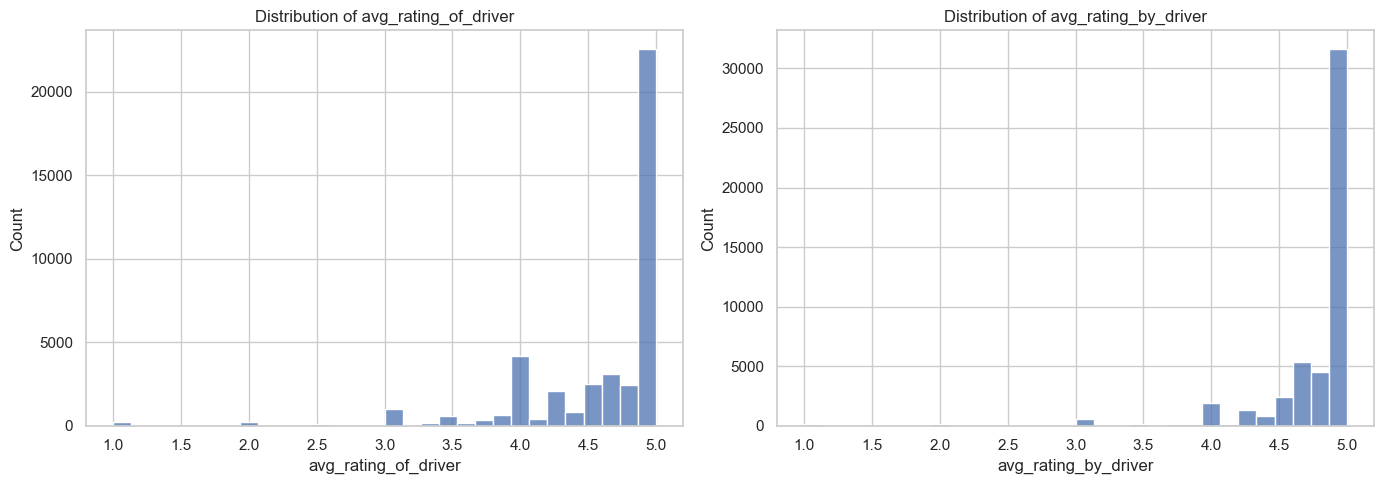

In [13]:
# check the nans for 'avg_rating_of_driver' and 'avg_rating_by_driver '

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(ultimate_data['avg_rating_of_driver'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('Distribution of avg_rating_of_driver')

sns.histplot(ultimate_data['avg_rating_by_driver'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of avg_rating_by_driver')

plt.tight_layout()
plt.show()

In [14]:
# The distribution is left skewed, so the nans will be replaced with median instead of average.

median_rating_driver = ultimate_data['avg_rating_of_driver'].median()
median_rating_by_driver = ultimate_data['avg_rating_by_driver'].median()

ultimate_data['avg_rating_of_driver'].fillna(median_rating_driver, inplace=True)
ultimate_data['avg_rating_by_driver'].fillna(median_rating_by_driver, inplace=True)

print(ultimate_data.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [15]:
# check the data type
print(ultimate_data.dtypes)

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object


In [16]:
# transform signup_date, last_trip_date into datetime types
ultimate_data['signup_date'] = pd.to_datetime(ultimate_data['signup_date'])
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])

In [17]:
# calculate retention
# finding the last trip date
last_date = ultimate_data['last_trip_date'].max()

# check if the users were active in the last 30 days before the last date
ultimate_data['retained'] = (last_date - ultimate_data['last_trip_date']).dt.days < 30

# calculate the retention rate
retention_rate = ultimate_data['retained'].mean()
print(retention_rate)

0.3662


*1. a) What fraction of the observed users were retained?*

**Anwer**: 36% of the users were retained.

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

In [18]:
from datetime import timedelta
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
# feature engineering
# active 6th month?

ultimate_data['start_of_6th_month'] = ultimate_data['signup_date'] + pd.DateOffset(months=5)

# Check for activity within the 6th calendar month after signup
ultimate_data['active_6m'] = ultimate_data.apply(lambda row: 
                                                  row['last_trip_date'] >= row['start_of_6th_month'] and 
                                                  row['last_trip_date'] < row['start_of_6th_month'] + pd.DateOffset(months=1), axis=1)

In [20]:
# Preprocessing
# features
X = ultimate_data.drop(['signup_date', 'last_trip_date', 'active_6m', 'start_of_6th_month'], axis=1)
#target
y = ultimate_data['active_6m']

# categorical & numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']),
        ('cat', OneHotEncoder(), ['city', 'phone', 'ultimate_black_user'])
    ])

# split: training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# model training
pipeline.fit(X_train, y_train)

# predicting
y_pred = pipeline.predict(X_test)

# eval metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print(f'Accuracy:', accuracy)
print(f'Class report:', class_report)
print(f'Confusion matrix:', conf_matrix)
print(f'ROC-AUC score:', roc_auc)

Accuracy: 0.7718
Class report:               precision    recall  f1-score   support

       False       0.83      0.88      0.85      7528
        True       0.55      0.44      0.49      2472

    accuracy                           0.77     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.76      0.77      0.76     10000

Confusion matrix: [[6635  893]
 [1389 1083]]
ROC-AUC score: 0.7867723175441674


* The Random Forest Classifier was selected for its effectiveness in handling complex, non-linear interactions between features without the need for explicit feature engineering, and its robustness against overfitting. It's favored for mixed data types and offers insight into feature importance. 
* With an accuracy of approximately 77% and an ROC-AUC of approximately 0.78, the model performed well on the test data, particularly in identifying users not active in their 6th month, as evidenced by high precision and recall for the 'False' class. 
* However, its moderate performance in predicting active users ('True' class) suggests potential issues with class imbalance. 
* Validation through k-fold cross-validation and improvements via hyperparameter tuning, class imbalance techniques, alternative models, or enhanced feature engineering could bolster the model's predictive power.